# Chapter4 Learning Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 4.2 loss function

### 4.2.1 mean squared error

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# correct is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1. if probability of 2 is highest
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

# ex2. if probability of 7 is highest
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2 cross entropy error

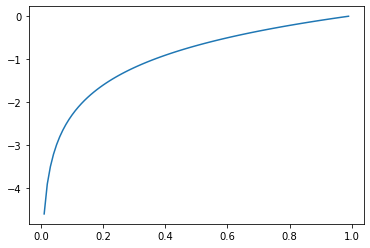

In [4]:
x = np.arange(0.01, 1, 0.01)
y = np.log(x)
plt.plot(x, y)
plt.show()

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 mini batch learning

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [8]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [9]:
np.random.choice(60000, 10)

array([49648, 42529, 29059, 50984, 42151, 57449, 21384, 44501, 49365,
       42292])

### 4.2.4 implementation of cross entropy error for mini batch learning

In [10]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.reshape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.reshape[0]
    return -np.sum(np.log(y[np.arange(batch_size, t)])) / batch_size

## 4.3 numerical differentiation

### 4.3.1 differential

In [12]:
# bad example
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [13]:
np.float32(1e-50)

0.0

In [14]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 example of numerical diffrentiation

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

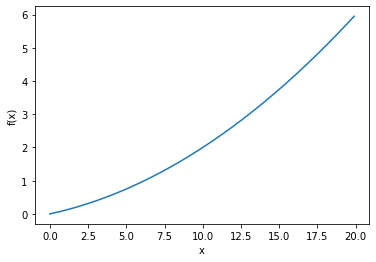

In [16]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [17]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 4.3.3 partial differentiation

In [18]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [19]:
def function_tmp1(x0):
    return x0**2 + 4**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [20]:
def function_tmp2(x1):
    return 3**2 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 gradient

In [21]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # calculate f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # calculate f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / 2*h
        x[idx] = tmp_val

    return grad

In [22]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6.e-08, 8.e-08])

In [23]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0.e+00, 4.e-08])

In [24]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6.e-08, 0.e+00])

### 4.4.1 gradient descent method

In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-2.9999994,  3.9999992])

In [27]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.99994,  3.99992])

In [28]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-3.,  4.])

### 4.4.2 gradient for newral network

In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # init Gaussian distribution

    def preditct(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.preditct(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [30]:
net = SimpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.preditct(x)
print(p)
print(np.argmax(p))
t = np.array([0, 0, 1])
print(net.loss(x, t))

[[-0.0382677  -0.12450991 -0.58598128]
 [-0.44913056 -0.06220848  0.27386217]]
[-0.42717812 -0.13069357 -0.10511282]
2
0.9930272279703866


In [31]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.1610696   0.21665823 -0.37772783]
 [ 0.2416044   0.32498734 -0.56659175]]


In [32]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 Implementation of Learning Algorithm

### 4.5.1 2Layers newral network class

In [33]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:input data t: teacher data
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    

In [34]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [35]:
x = np.random.rand(100, 784) # dummy input datas(100)
t = np.random.rand(100, 10) # dummy correct data(100)

grads = net.numerical_gradient(x, t) # calculate gradient

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 implementation of mini batch learning

In [36]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


In [37]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# hyper parameter
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # get mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # calculate gradirnt
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # update parameter
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # record learning result
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [38]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# number of iterations per epoch
iter_per_epoch = max(train_size / batch_size, 1)

# hyper parameter
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # get mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # calculate gradirnt
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # update parameter
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # record learning result
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # calculate accuracy per epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7808166666666667, 0.787
train acc, test acc | 0.87615, 0.8794
train acc, test acc | 0.89855, 0.9015
train acc, test acc | 0.9066666666666666, 0.9106
train acc, test acc | 0.91495, 0.9158
train acc, test acc | 0.9187, 0.92
train acc, test acc | 0.9232333333333334, 0.9252
train acc, test acc | 0.9267666666666666, 0.9284
train acc, test acc | 0.9303833333333333, 0.932
train acc, test acc | 0.93355, 0.934
train acc, test acc | 0.9364666666666667, 0.9372
train acc, test acc | 0.93825, 0.9374
train acc, test acc | 0.9413333333333334, 0.9411
train acc, test acc | 0.9429333333333333, 0.9424
train acc, test acc | 0.9445333333333333, 0.9425
train acc, test acc | 0.9465666666666667, 0.9451
